# Histogram based Gradient Boosting Regression


This Code template is for the regression analysis using a simple Histogram based Gradient Boosting Trees Regressor. This estimator is much faster than GradientBoostingRegressor for big datasets.

### Required Packages

In [18]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [19]:
#filepath
file_path= ""

List of features which are  required for model training .

In [20]:
#x_values
features=[]

Target feature for prediction.

In [21]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [23]:
df=pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [24]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [25]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [26]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

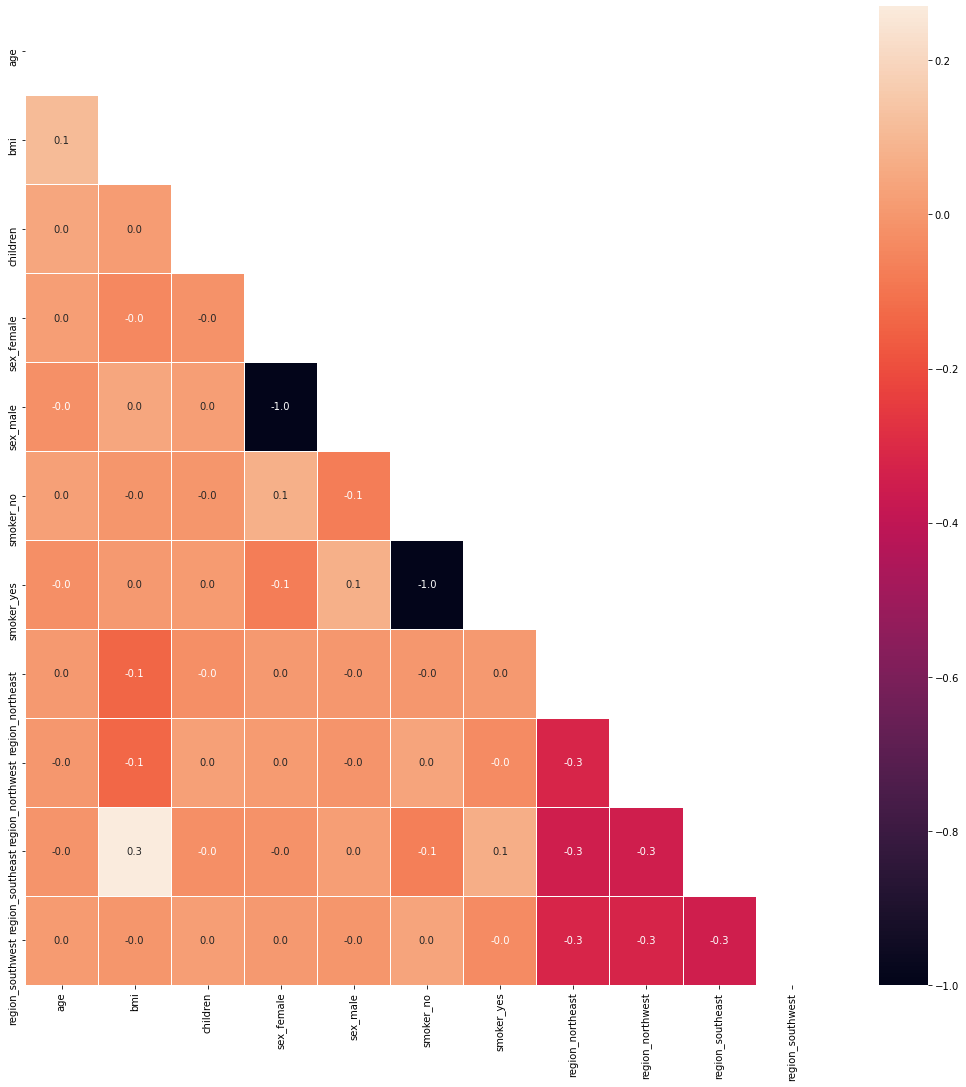

In [27]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Model

Histogram-based Gradient Boosting Regression Tree.This estimator is much faster than GradientBoostingRegressor for big datasets (n_samples >= 10 000).This estimator has native support for missing values (NaNs). 

#### Tuning Parameters 
[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html)

> **loss**: The loss function to use in the boosting process. Note that the “least squares” and “poisson” losses actually implement “half least squares loss” and “half poisson deviance” to simplify the computation of the gradient. Furthermore, “poisson” loss internally uses a log-link and requires y >= 0

> **learning_rate**: The learning rate, also known as shrinkage. This is used as a multiplicative factor for the leaves values. Use 1 for no shrinkage.

> **max_iter**: The maximum number of iterations of the boosting process, i.e. the maximum number of trees.

> **max_depth**: The maximum depth of each tree. The depth of a tree is the number of edges to go from the root to the deepest leaf. Depth isn’t constrained by default.

> **l2_regularization**: The L2 regularization parameter. Use 0 for no regularization (default).

> **early_stopping**: If ‘auto’, early stopping is enabled if the sample size is larger than 10000. If True, early stopping is enabled, otherwise early stopping is disabled.

> **n_iter_no_change**: Used to determine when to “early stop”. The fitting process is stopped when none of the last n_iter_no_change scores are better than the n_iter_no_change - 1 -th-to-last one, up to some tolerance. Only used if early stopping is performed.

> **tol**: The absolute tolerance to use when comparing scores during early stopping. The higher the tolerance, the more likely we are to early stop: higher tolerance means that it will be harder for subsequent iterations to be considered an improvement upon the reference score.

> **scoring**: Scoring parameter to use for early stopping. 

In [29]:
# model initialization and fitting
model = HistGradientBoostingRegressor(random_state=123)
model.fit(x_train,y_train)

HistGradientBoostingRegressor()

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.


In [30]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 88.56 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [31]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 88.56 %
Mean Absolute Error 2502.76
Mean Squared Error 17488344.94


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

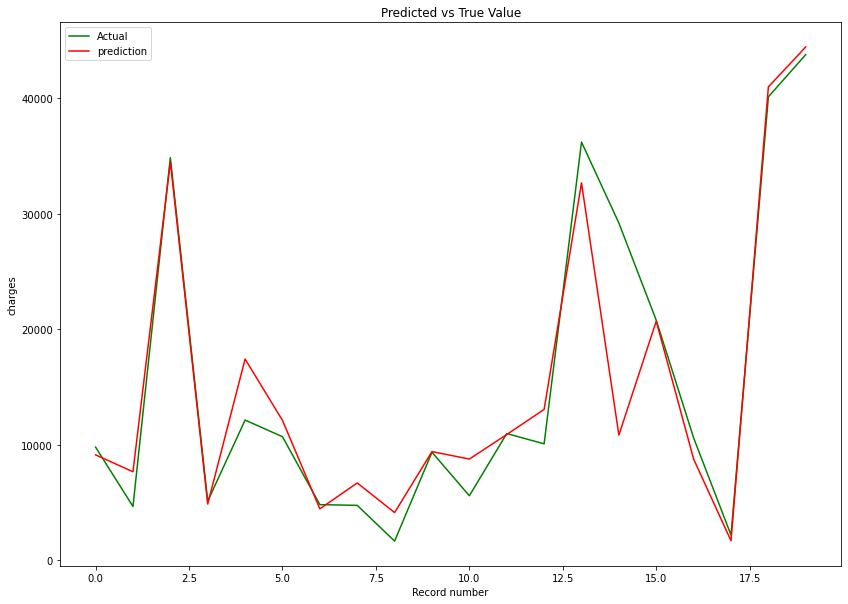

In [32]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(x_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Thilakraj Devadiga , Github: [Profile](https://github.com/Thilakraj1998)